In [1]:
# 주피터 노트북 환경설정
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

from IPython.core.display import display, HTML
# display(HTML("<style>.container { font-weight: bold !important; font-family:'Malgun Gothic' !important;}</style>"))
display(HTML("<style>.container { font-weight: bold !important;}</style>"))
display(HTML("<style>.container { width: 98% !important; }</style>"))


In [2]:
# 모듈 임포트 
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#  한글글꼴로 변경
plt.rcParams['font.size'] = 12.0
plt.rcParams['font.family'] = 'Malgun Gothic'

# 사이킷런 내장 예제 데이터

In [3]:
from sklearn.datasets import load_iris
iris = load_iris()
print(type(iris))

<class 'sklearn.utils._bunch.Bunch'>


In [4]:
# 불러온 데이터의 키, 값 확인하기
keys = iris.keys()
print('붓꽃 데이터 세트의 키들:', keys)

붓꽃 데이터 세트의 키들: dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


## 데이터프레임화 및 시각화

In [5]:
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)

iris_df['label'] = iris.target
iris_df.sample(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
64,5.6,2.9,3.6,1.3,1
44,5.1,3.8,1.9,0.4,0
83,6.0,2.7,5.1,1.6,1
65,6.7,3.1,4.4,1.4,1
24,4.8,3.4,1.9,0.2,0
149,5.9,3.0,5.1,1.8,2
117,7.7,3.8,6.7,2.2,2
59,5.2,2.7,3.9,1.4,1
132,6.4,2.8,5.6,2.2,2
138,6.0,3.0,4.8,1.8,2


Text(0.5, 1.0, 'petal')

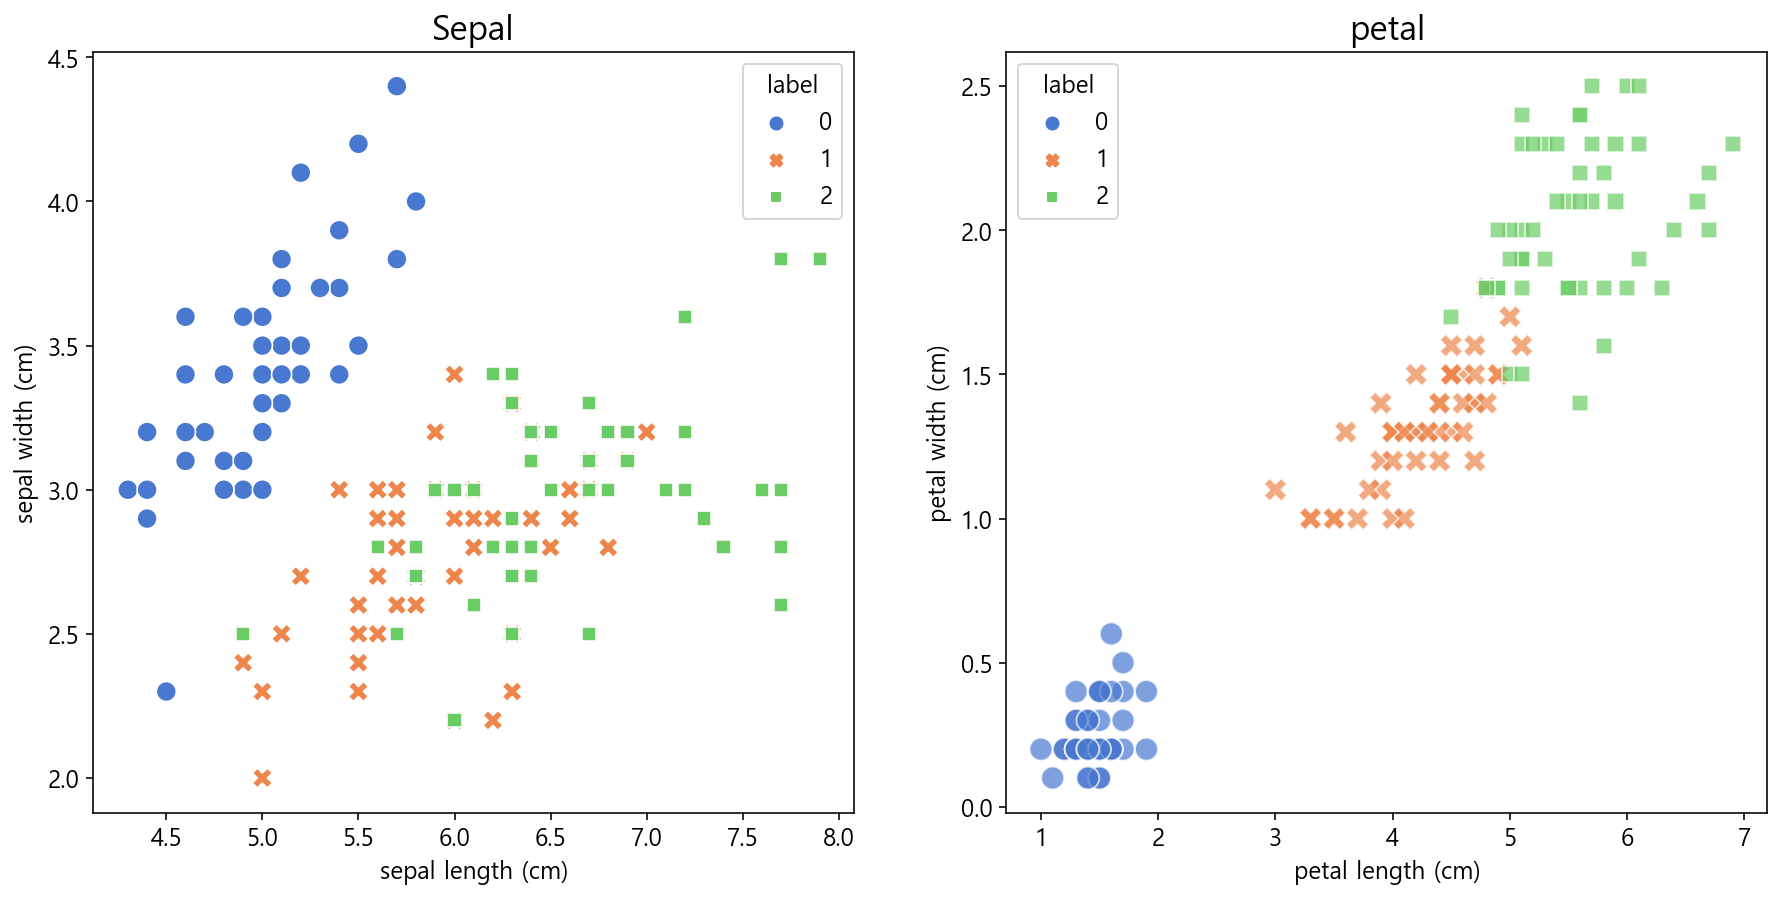

In [6]:
plt.figure(figsize=(15, 7))
plt.subplot(121)
sns.scatterplot(x='sepal length (cm)',
                y='sepal width (cm)', 
                hue='label', # different colors by group
                style='label', # different shapes by group
                s=100, # marker size
                data=iris_df, 
                palette='muted')
plt.title('Sepal', fontsize=17)


plt.subplot(122)
sns.scatterplot(x='petal length (cm)',
                y='petal width (cm)', 
                hue='label', # different colors by group
                style='label', # different shapes by group
                s=130, # marker size
                data=iris_df, 
                palette='muted', 
                alpha = 0.7)
plt.title('petal', fontsize=17)

# 머신러닝 과정

- 모듈 임포트
- 데이터 수집(학습 데이터)
- 데이터 전처리
- 데이터 학습(모델화)
- 데이터 예측(테스트 데이터)
- 데이터 테스트(정답률)

## 사이킷런을 이용하여 붓꽃(iris) 데이터 품종 예측하기

- 꽃받침(Sepal), 꽃잎(Petal) 각각의 길이와 폭을 이용하여 붓꽃의 품종(Versicolor, Virginia, Setosa)를 출력하라

<img src='https://t1.daumcdn.net/cfile/tistory/99CB703A5AF85F1F2C'>
<img src='https://t1.daumcdn.net/cfile/tistory/996F6F445AF85F1E27' width="300">

In [7]:
import sklearn
print(sklearn.__version__)

1.1.1


### 붓꽃 예측을 위한 사이킷런 필요 모듈 로딩

In [8]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [9]:
# 데이터 세트 로딩
import pandas as pd
iris = load_iris()
iris_data = iris.data

iris_label = iris.target
print('iris target값', iris_label)
print('iris_target명', iris.target_names)

iris target값 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
iris_target명 ['setosa' 'versicolor' 'virginica']


In [10]:
iris_df = pd.DataFrame(data = iris_data, columns=iris.feature_names)
iris_df['label'] = iris.target
iris_df.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


In [11]:
# 학습 데이터와 테스트 데이터 셋으로 분리
# X는 feature
# y는 target
X_train, X_test, y_train, y_test = train_test_split(iris_data, iris_label, test_size=0.2, random_state=11)

In [12]:
iris_df.shape, len(X_train), len(X_test)

((150, 5), 120, 30)

In [13]:
# 학습 데이터 셋으로 학습(Train)수행
model = DecisionTreeClassifier(random_state=11)

#학습 수행하기
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=11)

In [14]:
# 테스트 데이터 셋으로 예측(Predict) 수행
pred = model.predict(X_test)
pred

array([2, 2, 1, 1, 2, 0, 1, 0, 0, 1, 1, 1, 1, 2, 2, 0, 2, 1, 2, 2, 1, 0,
       0, 1, 0, 0, 2, 1, 0, 1])

In [15]:
# 예측 정확도 평가
from sklearn.metrics import accuracy_score
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test, pred)))

예측 정확도: 0.9333


# 피쳐 스케일링

- 두 특성(길이와 무게)의 값이 놓인 범위가 다르다. 
- 예를 들어 방의 넓이를 재는데 한 사람은 cm, 다른 사람은 inch로 재는 것과 같아 단위를 통일 시켜야 한다. 
- k-최근접 이웃 알고리즘은 샘플간의 거리에 영향을 많이 받으므로 특히 필요하나 결정 트리와 같은 알고리즘의 경우에는 스케일링에 많은 영향을 받지 않는다. 
- 표준 점수(Standard Score)
    - z 점수는 각 특성값이 0에서 표준편차의 몇배만큼 떨어져 있는지 표시한다.
    - 실제 특성값이 크기와 상관없이 동일한 조건으로 비교할 수 있다.
    - 각 데이터가 원점에서 몇 표준편차 만큼 떨어져 있는지 나타낸다.
- 분산 : 데이터에서 평균을 뺀 값으로 모두 제곱한 다음 평균을 내어 구한다.
- 표준편차 : 분산의 제곱근으로 데이터가 분산된 정도를 나타낸다.

## 표준화와 정규화
- 표준화는 데이터의 피쳐 각각이 평균이 0이고 분산이 1인 가우시안 정규 분포를 가진 값으로 변환하는 것을 의미한다.
- 정규화란 서로 다른 피처의 크기를 통일하기 위해 크기를 변환해주는 개념이다.

### 도미와 빙어 (스케일링)
- 스케일링에 따른 모델의 성능 테스트하기

In [16]:
# 데이터
# 35 도미 + 14 빙어 길이 cm
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]

# 35 도미 + 14 빙어 무게 g
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [17]:
len(fish_length), len(fish_weight)

(49, 49)

In [18]:
# 35 도미 => 1 + 14 빙어 => 0:49
fish_target = np.concatenate((np.ones(35), np.zeros(14)))
fish_target.shape

(49,)

In [19]:
# 데이터프레임화
# 빈 데이터프레임 생성하기
fish_data = pd.DataFrame(columns = ['fish_length', 'fish_weight', 'label'])

fish_data['fish_length'] = fish_length
fish_data['fish_weight'] = fish_weight
fish_data['label'] = fish_target
fish_data.sample(5)

,fish_length,fish_weight,label
15,32.0,600.0,1.0
31,38.5,955.0,1.0
6,29.7,500.0,1.0
46,13.0,12.2,0.0
19,33.5,650.0,1.0


In [20]:
fish_data.columns

Index(['fish_length', 'fish_weight', 'label'], dtype='object')

In [21]:
# 도미 출력해보기
fish_data.iloc[:35, :]

,fish_length,fish_weight,label
0,25.4,242.0,1.0
1,26.3,290.0,1.0
2,26.5,340.0,1.0
3,29.0,363.0,1.0
4,29.0,430.0,1.0
5,29.7,450.0,1.0
6,29.7,500.0,1.0
7,30.0,390.0,1.0
8,30.0,450.0,1.0
9,30.7,500.0,1.0


In [22]:
#방어
fish_data.iloc[35:, :]

,fish_length,fish_weight,label
35,9.8,6.7,0.0
36,10.5,7.5,0.0
37,10.6,7.0,0.0
38,11.0,9.7,0.0
39,11.2,9.8,0.0
40,11.3,8.7,0.0
41,11.8,10.0,0.0
42,11.8,9.9,0.0
43,12.0,9.8,0.0
44,12.2,12.2,0.0


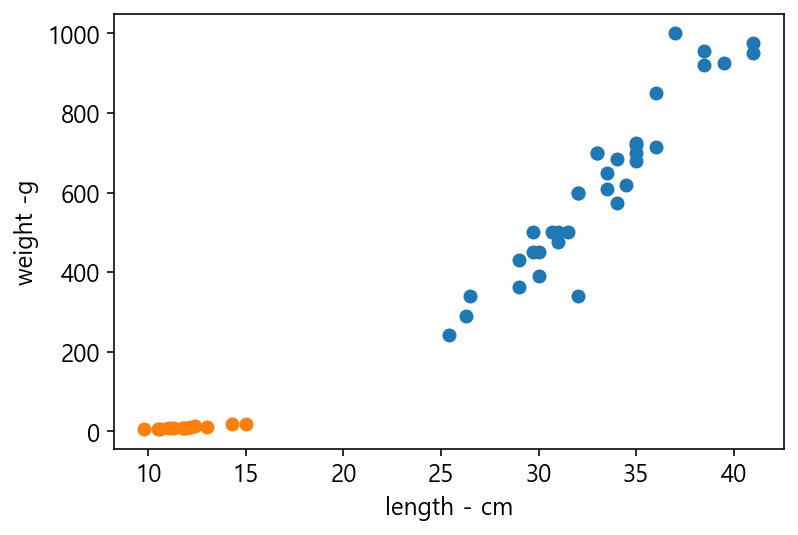

In [23]:
# 시각화
plt.scatter(fish_data.iloc[:35, 0], fish_data.iloc[:35,1]) #도미
plt.scatter(fish_data.iloc[35:, 0], fish_data.iloc[35:,1]) #빙어
plt.xlabel('length - cm')
plt.ylabel('weight -g')
plt.show()

In [24]:
# 학습 데이터와 테스트 데이터 분리
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(fish_data[['fish_length', 'fish_weight']] , fish_data['label'] , 
                                                    test_size=0.2, random_state=11, stratify=fish_data['label'])

In [25]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(39, 2) (39,)
(10, 2) (10,)


In [26]:
# 모델 선정 및 학습
from sklearn.neighbors import KNeighborsClassifier

model_kn = KNeighborsClassifier()
model_kn.fit(X_train, y_train)

model_kn.score(X_train, y_train), model_kn.score(X_test, y_test)

(1.0, 1.0)

#### KNeighborsClassifier의 주요 메서드 및 속성

In [27]:
print(dir(KNeighborsClassifier))

['__abstractmethods__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_abc_impl', '_check_algorithm_metric', '_check_feature_names', '_check_n_features', '_estimator_type', '_fit', '_get_param_names', '_get_tags', '_kneighbors_reduce_func', '_more_tags', '_repr_html_', '_repr_html_inner', '_repr_mimebundle_', '_validate_data', 'fit', 'get_params', 'kneighbors', 'kneighbors_graph', 'predict', 'predict_proba', 'score', 'set_params']


In [28]:
model_kn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [29]:
# 테스트 입력 데이터
print(X_test)
# 테스트 입력 데이터 예측 
print(model_kn.predict(X_test))
# 임의 선정 테스트 입력 데이터 
print(model_kn.predict([[9.8,6.7]]))

    fish_length  fish_weight
4          29.0        430.0
35          9.8          6.7
7          30.0        390.0
46         13.0         12.2
5          29.7        450.0
21         34.0        685.0
44         12.2         12.2
1          26.3        290.0
10         31.0        475.0
12         31.5        500.0
[1. 0. 1. 0. 1. 1. 0. 1. 1. 1.]
[0.]


In [30]:
print(model_kn.score(X_test, y_test))

1.0


In [31]:
# 근접한 이웃 찾기 메서드 => 이웃과의 거리, 이웃의 인덱스
model_kn.kneighbors([[26.3, 29.0]])
# 이웃과의 거리와 이웃의 인덱스를 별도 변수로 저장
distance, indexes = model_kn.kneighbors([[26.3, 290.0]])

In [32]:
# 2차원 => 1차원 flatten()
indexes.shape, indexes.flatten().shape

((1, 5), (5,))

In [33]:
# 이웃점들의 길이, 무게 데이터 확인하기
print(X_train.iloc[indexes.flatten(), 0], '\n\n', X_train.iloc[indexes.flatten(), 1])

0     25.4
2     26.5
13    32.0
3     29.0
8     30.0
Name: fish_length, dtype: float64 

 0     242.0
2     340.0
13    340.0
3     363.0
8     450.0
Name: fish_weight, dtype: float64


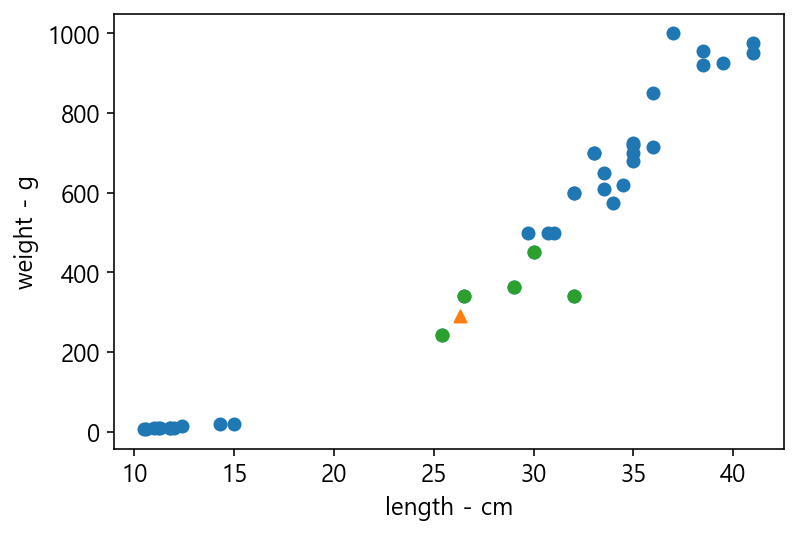

In [34]:
# 그래프 그려보기
# 전체 데이터
plt.scatter(X_train['fish_length'], X_train['fish_weight'])

# 특정 데이터
plt.scatter(26.3, 290.0, marker = '^')

# 특정 데이터의 이웃
plt.scatter(X_train.iloc[indexes.flatten(), 0], X_train.iloc[indexes.flatten(),1])

plt.xlabel('length - cm')
plt.ylabel('weight - g')
plt.show()

In [35]:
# 새로운 예측 데이터 넣어보기(도미)
# but 빙어로 나왔다. 왜?? 시각화를 통해서 확인해보기
print(model_kn.predict([[25, 150]]))

[0.]


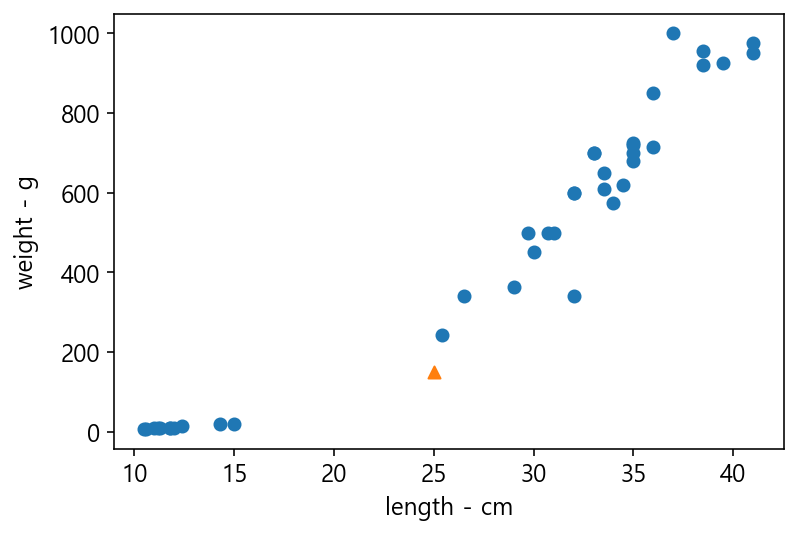

In [36]:
# 시각화 
plt.scatter(X_train['fish_length'], X_train['fish_weight'])

# 새로운 데이타 
plt.scatter(25, 150, marker='^')

plt.xlabel('length - cm')
plt.ylabel('weight - g')
plt.show()

In [37]:
# 특정 예측 데이터의 이웃 찾아보기
distances, indexes = model_kn.kneighbors([[25, 150]])
distances, indexes

(array([[ 92.00086956, 130.48375378, 130.73859415, 137.17988191,
         140.62090883]]),
 array([[20, 37, 38, 33, 27]], dtype=int64))

In [38]:
# 이웃들의 인덱스 찾기
print(X_train.iloc[[20, 37, 38, 33, 27]])

    fish_length  fish_weight
0          25.4        242.0
48         15.0         19.9
47         14.3         19.7
45         12.4         13.4
41         11.8         10.0


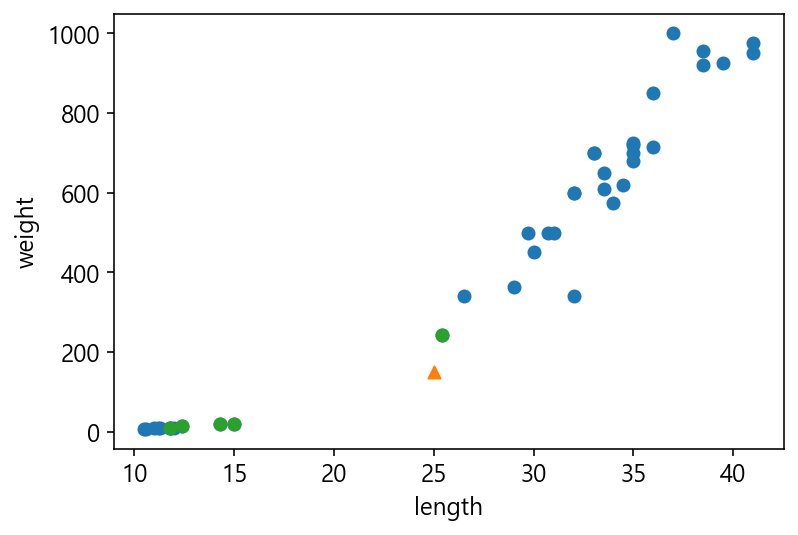

In [39]:
# 위에서 찾은 근접한 인덱스들 시각화 해보기
# 전체 
plt.scatter(X_train['fish_length'], X_train['fish_weight'])

# 새로운데이타 (테스트 데이타에는 없다.)
plt.scatter(25, 150, marker='^')

# 이웃의 데이타 
plt.scatter(X_train.iloc[indexes.flatten(), 0], X_train.iloc[indexes.flatten(), 1])
# plt.scatter(X_train.iloc[20, 0], X_train.iloc[20, 1], marker='D', color='r')
# plt.scatter(X_train.iloc[37, 0], X_train.iloc[37, 1], marker='D', color='r')
# plt.scatter(X_train.iloc[38, 0], X_train.iloc[38, 1], marker='D', color='r')
# plt.scatter(X_train.iloc[33, 0], X_train.iloc[33, 1], marker='D', color='r')
# plt.scatter(X_train.iloc[27, 0], X_train.iloc[27, 1], marker='D', color='r')

plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [40]:
# 가까운 거리 5개의 값 찾아보기
print(distances)

[[ 92.00086956 130.48375378 130.73859415 137.17988191 140.62090883]]


In [41]:
# 스케일링 해주기 
mean = np.mean(X_train, axis = 0)
std = np.std(X_train, axis = 0)
print(mean, '\n')
print(std)

fish_length     27.671795
fish_weight    475.112821
dtype: float64 

fish_length     10.379416
fish_weight    338.837654
dtype: float64


In [42]:
X_train.describe()

,fish_length,fish_weight
count,39.000000,39.000000
mean,27.671795,475.112821
std,10.515101,343.267093
min,10.500000,7.000000
25%,14.650000,19.800000
50%,32.000000,575.000000
75%,35.000000,707.000000
max,41.000000,1000.000000


In [43]:
# (데이터 - 평균) / 표준편차 
X_train_scaled = (X_train - mean) / std
X_train_scaled.head(3)

,fish_length,fish_weight
20,0.609688,0.294794
42,-1.529161,-1.372967
6,0.195406,0.073449


#### 직접 스케일링 해보기

In [44]:
# 테스트 데이터 스케일링
new = ([25, 150] - mean) / std
new

fish_length   -0.257413
fish_weight   -0.959494
dtype: float64

In [45]:
# 재학습 시키기
model_kn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [46]:
# 테스트용 데이터 스케일링
X_test_scaled = (X_test - mean) / std

In [47]:
# 테스트용 데이터 스케일 확인하기
X_test_scaled.sample(3)

,fish_length,fish_weight
35,-1.721850,-1.382411
46,-1.413547,-1.366179
7,0.224310,-0.251191


In [48]:
model_kn.score(X_test_scaled, y_test)

1.0

In [49]:
# 스케일링 후 의 도미 데이터 결과
# 올바르게 도미로 확인
print(model_kn.predict([new]))

[1.]


In [50]:
# 이웃 찾는 과정 반복
distances, indexes = model_kn.kneighbors([new])
distances, indexes

(array([[0.27423776, 0.57906392, 0.73734587, 0.87707531, 1.00794545]]),
 array([[20, 21, 29,  9, 17]], dtype=int64))

In [51]:
# 스케일링 전의 이웃 인덱스 [20, 37, 38, 33 ,27]
# 현재의 스케일링 이후 이웃 인덱스 [20, 21, 29, 9, 17]

In [52]:
indexes.flatten()

array([20, 21, 29,  9, 17], dtype=int64)

In [53]:
X_train_scaled.iloc[indexes.flatten()]

,fish_length,fish_weight
0,-0.218875,-0.687978
2,-0.112896,-0.398754
3,0.127965,-0.330875
13,0.416999,-0.398754
8,0.224310,-0.074115


In [54]:
type(new)
new

fish_length   -0.257413
fish_weight   -0.959494
dtype: float64

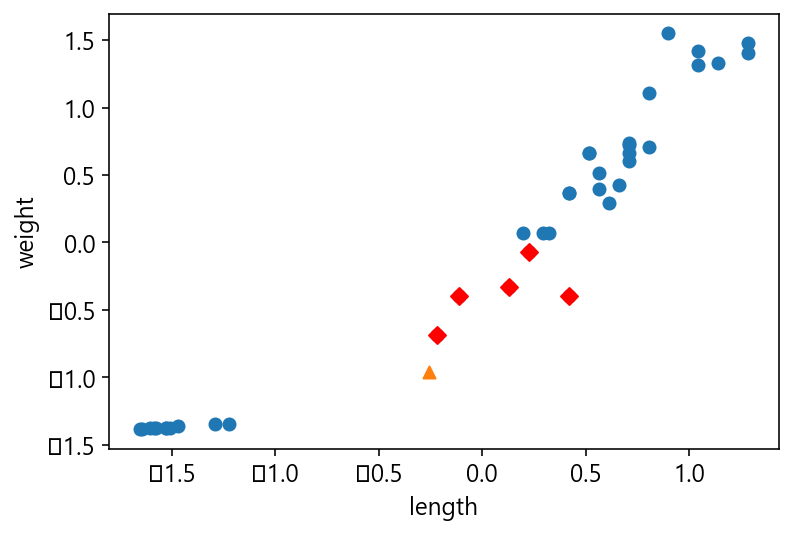

In [55]:
# 스케일링 후의 시각화 
plt.scatter(X_train_scaled['fish_length'], X_train_scaled['fish_weight'])
plt.scatter(new[0], new[1], marker='^')

# 이웃 확인하기
plt.scatter(X_train_scaled.iloc[indexes.flatten(), 0], X_train_scaled.iloc[indexes.flatten(), 1], marker='D', color='r')

plt.xlabel('length')
plt.ylabel('weight')
plt.show()